# GRIP:- The Sparks Foundation
**Data Science and Business Analytics**


**Author:- Hrithik Sharma**


**Task 1:- Prediction using Supervised ML**

**Predict the percentage of an student based on the number of study hours.** 

# Importing Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis 

In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.shape

(25, 2)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# Input Plot

<AxesSubplot:>

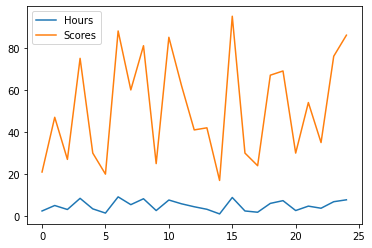

In [10]:
data.plot()

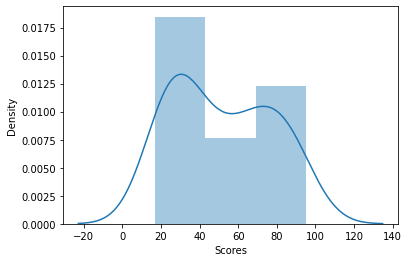

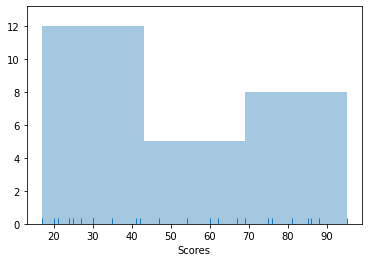

In [11]:
sns.distplot(data["Scores"])
plt.show()

sns.distplot(data["Scores"], kde=False, rug=True)
plt.show()

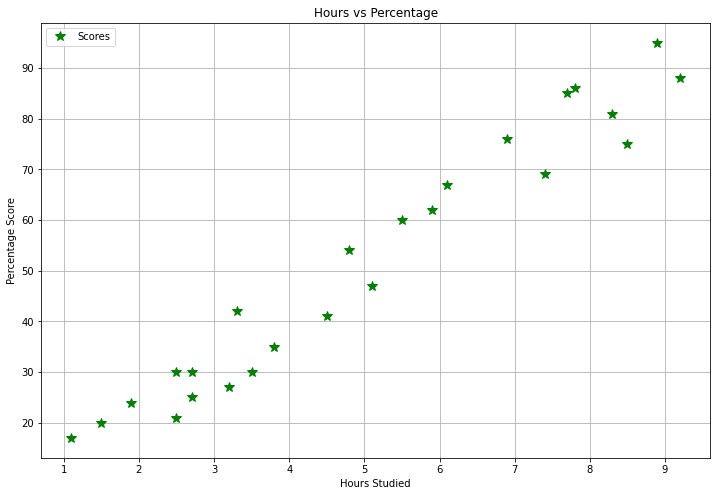

In [12]:
plt.rcParams["figure.figsize"] = [12,8]
data.plot(x='Hours', y='Scores', style='*', color='green', markersize=10)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

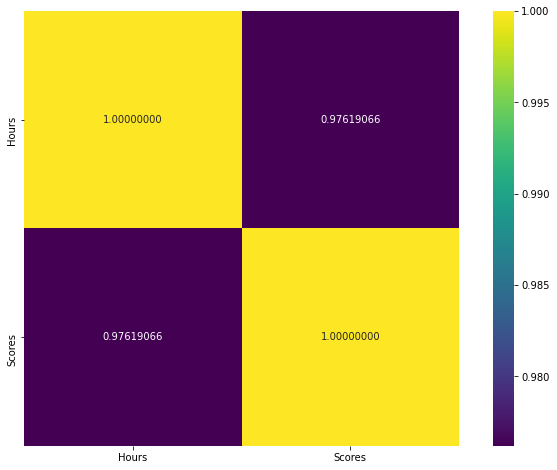

In [13]:
corr = data.corr()
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.8f', cmap='viridis')
plt.show()


In [14]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [15]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [16]:
from sklearn.linear_model import LinearRegression

# Training Model

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X,y)

LinearRegression()

In [19]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [20]:
print("Co-efficient: ",lr.coef_)

Co-efficient:  [9.77580339]


In [21]:
print("Intercept: ",lr.intercept_)

Intercept:  2.48367340537321


# Plot the Fitted line

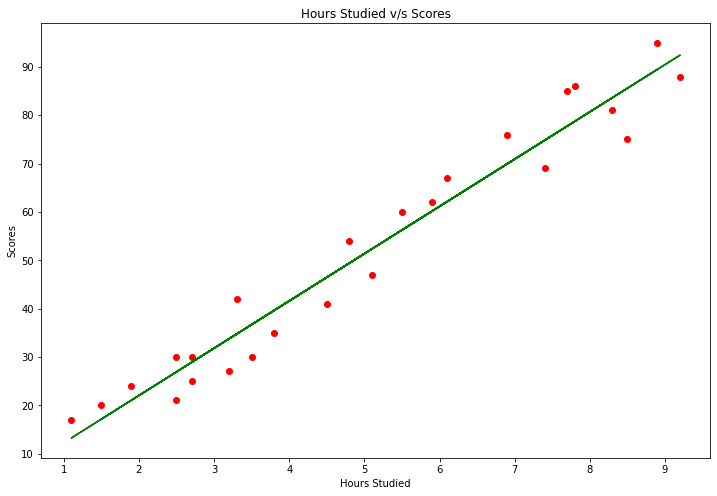

In [22]:
plt.scatter(X, y, color = "red")
plt.plot(X, lr.predict(X), color = "green")
plt.title("Hours Studied v/s Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

# Predicting the output

In [23]:
hours = 9.25
score = lr.predict([[hours]])
score = '%.2f'%(score)
print("If a person studies for {} hours \nThe score will be : {}".format(hours, score))

If a person studies for 9.25 hours 
The score will be : 92.91


# Model Evaluation

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [25]:
y_pred = lr.predict(X)

In [26]:
print("Mean Absolute Error : ",metrics.mean_absolute_error(y,y_pred))

Mean Absolute Error :  4.972805319866375


In [27]:
print("R2 Score : ",r2_score(y,y_pred))

R2 Score :  0.9529481969048356
